# KNN no `chb18_com_dwt`

Explorando 20 rodadas de classificação com `KNN` em sua configuração padrão com o dataframe extraído com DWT para encontrar canal com melhor desempenho.

Por fim salvando a tabela com médias, desvios padrão e medianas do desempenho de cada canal.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_array = np.load('./../20_seeds.npy')
print(f'seeds: {seed_array}')

seeds: [4382 8968 8442 1729  290  490 2128 1167 8900 5078 1359  894 7809 6990
 3623 5906 1687 7080 5473 7854]


## 20 rodadas

In [2]:
chb_DF = pd.read_csv('./chb18_com_dwt.csv')
target_S = chb_DF.pop('target')

accuracy_DF = pd.DataFrame()

# agrupa todas colunas pelo mesmo número do canal
colunas_agrupadas_por_numero = []
for i in range(18):
    colunas_agrupadas_por_numero.append(
        [column for column in chb_DF.columns if f'{i}' in column.split('-')]
    )

for numero_da_coluna, colunas in enumerate(colunas_agrupadas_por_numero):
    X, y = chb_DF[colunas].values, target_S.values

    acc = []   

    for seed in seed_array:
        # Distribuindo os dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
        
        # Instanciando e treinando classificador
        model = KNeighborsClassifier().fit(X_train, y_train)

        # Adicionando resultados às respectivas listas
        acc.append(model.score(X_test, y_test))

    accuracy_DF[f'{numero_da_coluna}'] = acc

accuracy_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.695652,0.782609,0.880435,0.934783,0.728261,0.771739,0.902174,0.956522,0.750000,0.836957,0.891304,0.913043,0.641304,0.782609,0.967391,0.934783,0.771739,0.891304
1,0.630435,0.826087,0.913043,0.978261,0.706522,0.826087,0.891304,0.934783,0.771739,0.869565,0.913043,0.891304,0.739130,0.750000,0.978261,0.934783,0.782609,0.891304
2,0.673913,0.815217,0.902174,0.967391,0.771739,0.663043,0.858696,0.923913,0.750000,0.815217,0.891304,0.869565,0.695652,0.739130,1.000000,0.967391,0.684783,0.869565
3,0.684783,0.826087,0.847826,0.956522,0.728261,0.739130,0.891304,0.967391,0.793478,0.869565,0.945652,0.880435,0.717391,0.793478,1.000000,0.913043,0.706522,0.869565
4,0.663043,0.826087,0.869565,0.945652,0.760870,0.695652,0.891304,0.913043,0.793478,0.826087,0.923913,0.891304,0.652174,0.760870,0.956522,0.934783,0.652174,0.793478
5,0.717391,0.826087,0.891304,0.923913,0.717391,0.815217,0.934783,0.923913,0.695652,0.750000,0.880435,0.902174,0.663043,0.728261,0.967391,0.945652,0.760870,0.869565
6,0.652174,0.826087,0.869565,0.956522,0.760870,0.771739,0.945652,0.956522,0.750000,0.847826,0.869565,0.902174,0.684783,0.706522,0.989130,0.923913,0.739130,0.858696
7,0.760870,0.826087,0.934783,0.956522,0.750000,0.771739,0.913043,0.956522,0.804348,0.891304,0.923913,0.945652,0.608696,0.836957,0.989130,0.945652,0.793478,0.923913
8,0.717391,0.836957,0.923913,0.956522,0.684783,0.836957,0.913043,0.978261,0.760870,0.836957,0.869565,0.934783,0.728261,0.760870,0.989130,0.945652,0.771739,0.880435
9,0.706522,0.858696,0.913043,0.956522,0.739130,0.782609,0.902174,0.945652,0.760870,0.815217,0.923913,0.891304,0.695652,0.750000,0.978261,0.923913,0.739130,0.913043


,count,mean,std,min,25%,50%,75%,max
14,20.0,0.983152,0.013417,0.956522,0.975543,0.983696,0.991848,1.000000
3,20.0,0.950543,0.017087,0.923913,0.942935,0.956522,0.956522,0.989130
7,20.0,0.940217,0.020411,0.902174,0.923913,0.940217,0.956522,0.978261
15,20.0,0.939130,0.018120,0.913043,0.923913,0.940217,0.948370,0.967391
10,20.0,0.909783,0.030965,0.869565,0.888587,0.907609,0.923913,0.989130
6,20.0,0.904348,0.029209,0.847826,0.891304,0.902174,0.923913,0.945652
11,20.0,0.904348,0.026058,0.858696,0.891304,0.902174,0.923913,0.945652
2,20.0,0.898370,0.032566,0.836957,0.877717,0.902174,0.913043,0.978261
17,20.0,0.880435,0.030337,0.793478,0.869565,0.885870,0.894022,0.923913
9,20.0,0.846196,0.039155,0.750000,0.823370,0.847826,0.869565,0.913043


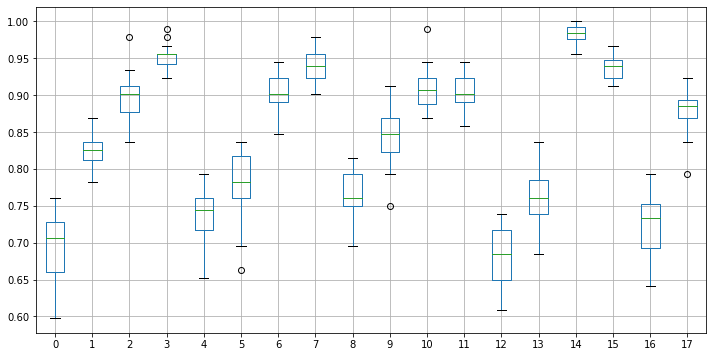

In [3]:
accuracy_DF.boxplot(figsize=(12, 6))
accuracy_DF.describe().transpose().sort_values(by='mean', ascending=False)

## Salvando rank em arquivo csv

In [4]:
save_DF = accuracy_DF.describe().transpose()[['mean', 'std', '50%']]
save_DF['chb'] = '18'
save_DF['channel'] = save_DF.index

save_DF.to_csv(path_or_buf='./knn_descr_channel_rank.csv', index=False)
save_DF

,mean,std,50%,chb,channel
0,0.694565,0.045423,0.706522,18,0
1,0.824457,0.021531,0.826087,18,1
2,0.898370,0.032566,0.902174,18,2
3,0.950543,0.017087,0.956522,18,3
4,0.735870,0.036496,0.744565,18,4
5,0.781522,0.047169,0.782609,18,5
6,0.904348,0.029209,0.902174,18,6
7,0.940217,0.020411,0.940217,18,7
8,0.759783,0.036970,0.760870,18,8
9,0.846196,0.039155,0.847826,18,9
